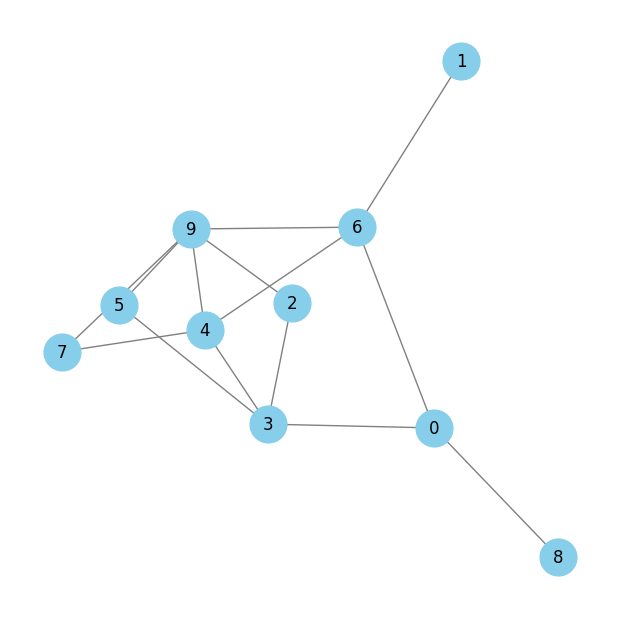

True
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


In [1]:
### CREATE A RANDOM GRAPH G ###

import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 10 # Number of nodes
p = 0.3  # Probability of edge creation

# Generate a random connected Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()
print(nx.is_connected(G))

# Assign labels to nodes based on their connected component
component_labels = {node: i for i, component in enumerate(nx.connected_components(G)) for node in component}

# Print node labels
print(component_labels)

In [2]:
### CREATE SPANNING TREE ###

import networkx as nx
import random

# Select a random starting node
random_node = random.choice(list(G.nodes))

# Get a spanning tree using DFS
spanning_tree = nx.dfs_tree(G, source=random_node)

# Convert spanning tree to an undirected graph
spanning_tree_undirected = nx.Graph(spanning_tree)

print(spanning_tree_undirected.edges())

[(1, 6), (6, 0), (0, 3), (0, 8), (3, 2), (2, 9), (9, 4), (9, 5), (4, 7)]


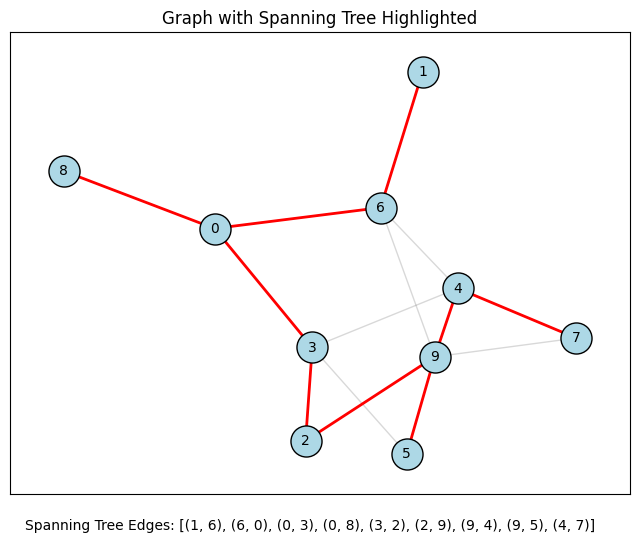

In [3]:
### PRINT SPANNING TREE ###

def plot_spanning_tree(G, spanning_tree):
    """Plot the original graph and highlight the undirected spanning tree edges."""
    
    pos = nx.spring_layout(G)  # Compute layout for nodes

    plt.figure(figsize=(8, 6))

    # Draw the original graph edges first (background edges)
    nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.3, width=1)

    # Draw spanning tree edges in red
    nx.draw_networkx_edges(spanning_tree, pos, edge_color="red", width=2)

    # Draw nodes on top of edges
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", edgecolors="black", node_size=500)

    # Draw labels on top
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    plt.title("Graph with Spanning Tree Highlighted")

    # Add subtitle below the graph listing the spanning tree edges
    spanning_tree_edges = list(spanning_tree.edges())
    subtitle = f"Spanning Tree Edges: {spanning_tree_edges}"
    plt.figtext(0.5, 0.05, subtitle, wrap=True, horizontalalignment='center', fontsize=10)
    
    plt.show()



# Plot the graph with the spanning tree highlighted
plot_spanning_tree(G, spanning_tree_undirected)

In [4]:
### GENERATE SET OF FUNDAMENTAL CYCLES ###

import networkx as nx
import random

# Ensure spanning tree edges are treated as undirected
spanning_tree_edges = set(spanning_tree_undirected.edges())

# Find edges not in the spanning tree (back edges)
generating_edges = [(u, v) for u, v in G.edges() if (u, v) not in spanning_tree_edges and (v, u) not in spanning_tree_edges]

print("Generating edges:", generating_edges)
print("All Graph Edges:", list(G.edges()))
print("Spanning Tree Edges:", list(spanning_tree_undirected.edges()))

# Find the fundamental set of cycles
fundamental_cycles = []
for u, v in generating_edges:
    print(u, v)
    # Find the path in the spanning tree between u and v
    path = nx.shortest_path(spanning_tree_undirected, source=u, target=v)
    cycle = path + [u]  # Complete the cycle
    print(f"Edge ({u}, {v}) generates cycle: {cycle}")
    fundamental_cycles.append(cycle)

# Print fundamental cycles
for i, cycle in enumerate(fundamental_cycles):
    print(f"Cycle {i+1}: {cycle} (generated by edge {generating_edges[i]})")


Generating edges: [(3, 4), (3, 5), (4, 6), (6, 9), (7, 9)]
All Graph Edges: [(0, 3), (0, 6), (0, 8), (1, 6), (2, 3), (2, 9), (3, 4), (3, 5), (4, 6), (4, 7), (4, 9), (5, 9), (6, 9), (7, 9)]
Spanning Tree Edges: [(1, 6), (6, 0), (0, 3), (0, 8), (3, 2), (2, 9), (9, 4), (9, 5), (4, 7)]
3 4
Edge (3, 4) generates cycle: [3, 2, 9, 4, 3]
3 5
Edge (3, 5) generates cycle: [3, 2, 9, 5, 3]
4 6
Edge (4, 6) generates cycle: [4, 9, 2, 3, 0, 6, 4]
6 9
Edge (6, 9) generates cycle: [6, 0, 3, 2, 9, 6]
7 9
Edge (7, 9) generates cycle: [7, 4, 9, 7]
Cycle 1: [3, 2, 9, 4, 3] (generated by edge (3, 4))
Cycle 2: [3, 2, 9, 5, 3] (generated by edge (3, 5))
Cycle 3: [4, 9, 2, 3, 0, 6, 4] (generated by edge (4, 6))
Cycle 4: [6, 0, 3, 2, 9, 6] (generated by edge (6, 9))
Cycle 5: [7, 4, 9, 7] (generated by edge (7, 9))


In [5]:
bridges = {}
for c in fundamental_cycles:
    print(c)
    bridges[tuple(c)] = []
    G_no_c = G.copy()
    G_no_c.remove_edges_from([(c[i], c[i+1]) for i in range(len(c)-1)])
    

[3, 2, 9, 4, 3]
[3, 2, 9, 5, 3]
[4, 9, 2, 3, 0, 6, 4]
[6, 0, 3, 2, 9, 6]
[7, 4, 9, 7]


Processing cycle: [3, 2, 9, 4, 3]
Bridges: [[(0, 3), (0, 6), (0, 8), (6, 1), (6, 4), (6, 9)], [(3, 5), (5, 9)], [(4, 7), (7, 9)]]


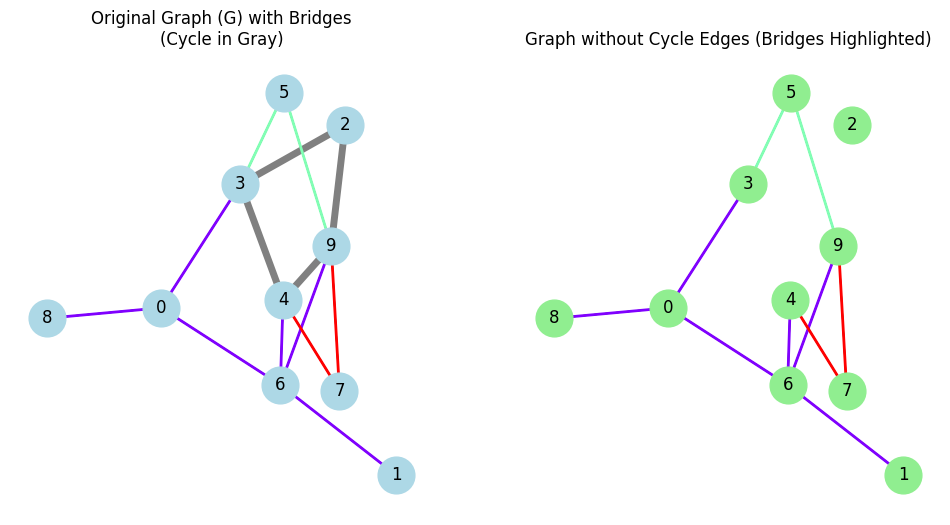

Processing cycle: [3, 2, 9, 5, 3]
Bridges: [[(0, 3), (0, 6), (0, 8), (6, 1), (6, 4), (6, 9), (4, 3), (4, 7), (4, 9), (7, 9)]]


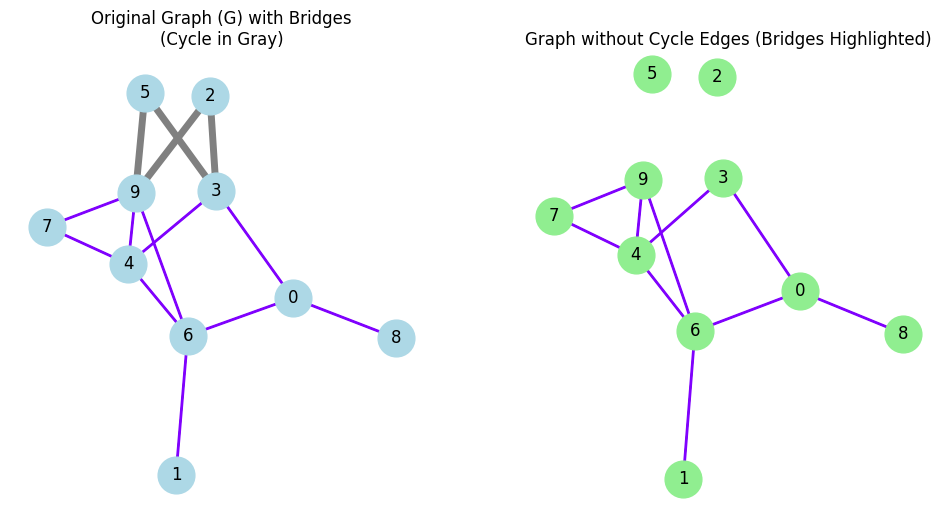

Processing cycle: [4, 9, 2, 3, 0, 6, 4]
Bridges: [[(0, 8)], [(1, 6)], [(3, 4)], [(3, 5), (5, 9)], [(4, 7), (7, 9)], [(6, 9)]]


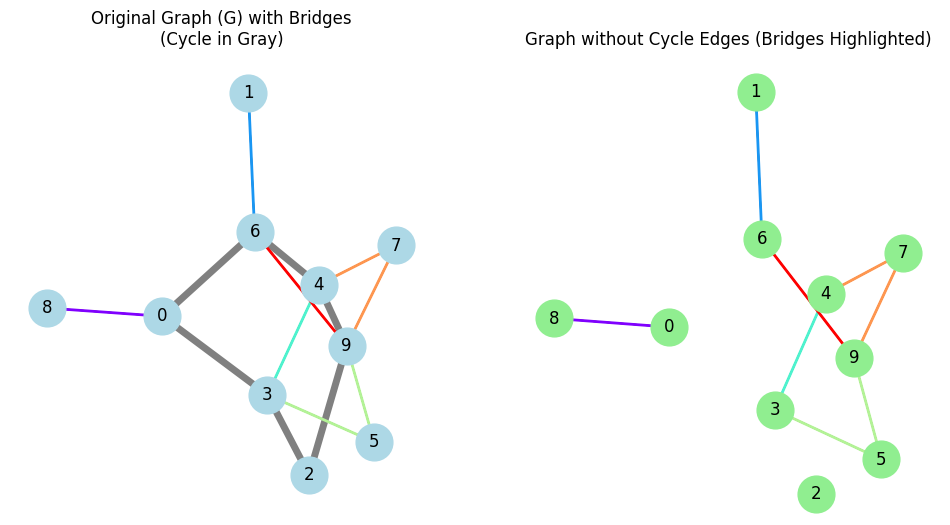

Processing cycle: [6, 0, 3, 2, 9, 6]
Bridges: [[(0, 8)], [(1, 6)], [(3, 4), (4, 6), (4, 7), (4, 9), (7, 9)], [(3, 5), (5, 9)]]


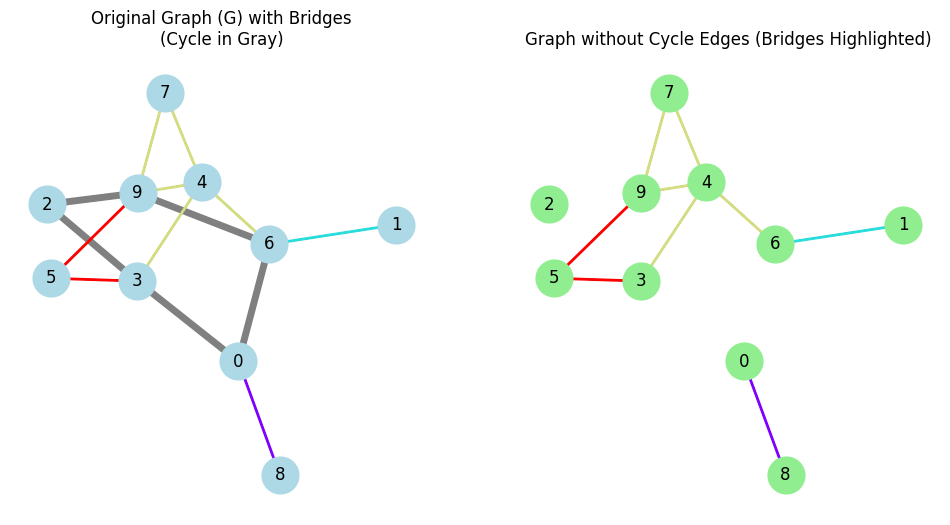

Processing cycle: [7, 4, 9, 7]
Bridges: [[(0, 3), (3, 2), (3, 4), (3, 5), (0, 6), (0, 8), (2, 9), (5, 9), (6, 1), (6, 4), (6, 9)]]


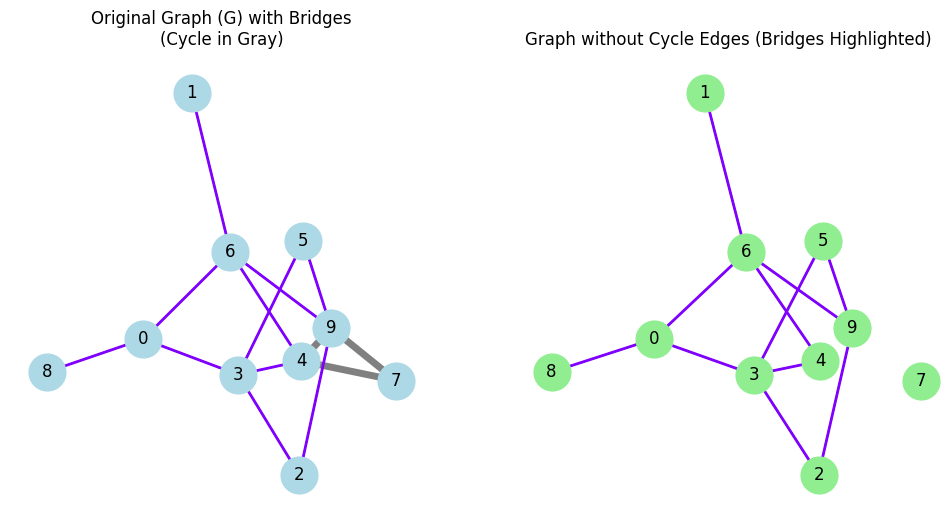

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

from collections import deque

bridges = {}

def find_bridge(G, node, bridge, unvisited):
    print(node, bridge, unvisited)
    for neigh in G.neighbors(node):
        bridge.append(neigh)
        if neigh in unvisited:
            unvisited.remove(neigh)
        if neigh not in c:
            find_bridge(G, node, bridge, unvisited)
        
for c in fundamental_cycles:
    print("Processing cycle:", c)
    
    # Create a copy of the graph and remove cycle edges
    G_no_c_edges = G.copy()
    G_no_c_nodes = G.copy()
    G_no_c_edges.remove_edges_from([(c[i], c[i+1]) for i in range(len(c)-1)])
    G_no_c_nodes.remove_nodes_from(c)
    
    unvisited = list(G_no_c_edges.edges()) ## habría que poner los del ciclo?? para empezar no pero como visited?
    bridges = []
    q = deque()
    # print("unvisited", unvisited)
    for edge1 in G_no_c_edges.edges():
        if edge1 in unvisited:  
            # print("edge", edge1)
            q.append(edge1)
            unvisited.remove(edge1)
            bridge = [edge1]
            while q:
                edge2 = q.popleft()  # Current edge being processed
                u, v = edge2  # Extract nodes from the edge
                
                # Explore edges connected to `v`
                if v not in c:
                    for neighbor in G_no_c_edges.neighbors(v): 
                        # print(v, "vecino:" ,neighbor)
                        new_edge = (v, neighbor) 
                        new_edge_rev = (neighbor, v)
                        # print(new_edge)
                        # print(unvisited)
                        if (new_edge in unvisited) or (new_edge_rev in unvisited) :  # Ensure it's unvisited and not in the cycle
                            # print("añadir")
                            if new_edge in unvisited:
                                unvisited.remove(new_edge)
                            else:
                                unvisited.remove(new_edge_rev)
                            if neighbor not in c:
                                q.append(new_edge)
                            bridge.append(new_edge)
    
                # Explore edges connected to `u` (since undirected)
                if u not in c:
                    for neighbor in G_no_c_edges.neighbors(u):
                        # print(u, "vecino:" ,neighbor)
                        new_edge = (u, neighbor) 
                        new_edge_rev = (neighbor, u)
                        if (new_edge in unvisited) or (new_edge_rev in unvisited):  # Ensure it's unvisited and not in the cycle
                            # print("añadir")
                            if new_edge in unvisited:
                                unvisited.remove(new_edge)
                            else:
                                unvisited.remove(new_edge_rev)
                            if neighbor not in c:
                                q.append(new_edge)
                            bridge.append(new_edge)
    
            bridges.append(bridge)  # Store the final edge-connected component
    print("Bridges:", bridges)
    
    #############################
    ### PLOT CYCLE AND GRAPH WO CYCLE ###
    import matplotlib.cm as cm
    import numpy as np

    # Create a figure with two side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Generate a colormap with different colors for bridges **excluding gray**
    num_bridges = len(bridges)
    colors = cm.rainbow(np.linspace(0, 1, num_bridges))  # Get full rainbow range
    colors = [color for color in colors if not np.allclose(color[:3], [0.5, 0.5, 0.5])]  # Exclude gray

    # Layout for both graphs (ensures consistent node positions)
    pos = nx.spring_layout(G)

    ### LEFT GRAPH: ORIGINAL GRAPH (G) WITH CYCLE AND BRIDGES ###
    axes[0].set_title("Original Graph (G) with Bridges\n(Cycle in Gray)")

    # Draw all nodes
    nx.draw(G, pos, ax=axes[0], with_labels=True, node_color="lightblue", node_size=700)

    # Draw all edges in black by default
    nx.draw_networkx_edges(G, pos, ax=axes[0], edge_color="black")

    # Highlight the cycle edges in **thicker gray**
    nx.draw_networkx_edges(G, pos, edgelist=[(c[i], c[i+1]) for i in range(len(c)-1)], edge_color="gray", ax=axes[0], width=5)

    # Draw each bridge in a different color (excluding gray)
    for bridge, color in zip(bridges, colors):
        nx.draw_networkx_edges(G, pos, edgelist=bridge, edge_color=[color], ax=axes[0], width=2)

    ### RIGHT GRAPH: MODIFIED GRAPH (G_no_c_edges) WITH BRIDGES ###
    axes[1].set_title("Graph without Cycle Edges (Bridges Highlighted)")

    # Draw all nodes
    nx.draw(G_no_c_edges, pos, ax=axes[1], with_labels=True, node_color="lightgreen", node_size=700)

    # Draw all edges in black by default
    nx.draw_networkx_edges(G_no_c_edges, pos, ax=axes[1], edge_color="black")

    # Draw each bridge in a different color (excluding gray)
    for bridge, color in zip(bridges, colors):
        nx.draw_networkx_edges(G_no_c_edges, pos, edgelist=bridge, edge_color=[color], ax=axes[1], width=2)

    # Show the visualization
    plt.show()
    ### END PLOT CYCLE AND GRAPH WO CYCLE ###
    #############################




In [7]:
# GENERADOR DE CICLOS ANTIGUO MALO

# import networkx as nx
# import random

# # Select a random starting node
# random_node = random.choice(list(G.nodes))

# # Get a spanning tree using DFS
# spanning_tree = nx.dfs_tree(G, source=random_node)

# # Convert spanning tree to an undirected graph
# spanning_tree_undirected = nx.Graph(spanning_tree)

# # Find edges not in the spanning tree (back edges)
# generating_edges = list(G.edges() - spanning_tree.edges())
# print("Generating edges: ", generating_edges, G.edges(), spanning_tree_undirected.edges())
# # Find the fundamental set of cycles
# fundamental_cycles = []
# for u, v in generating_edges:
#     # Find the path in the spanning tree between u and v
#     path = nx.shortest_path(spanning_tree_undirected, source=u, target=v)
#     cycle = path + [u]  # Complete the cycle
#     print(u, v, cycle)
#     fundamental_cycles.append(cycle)

# # Print fundamental cycles
# for i, cycle in enumerate(fundamental_cycles):
#     print(f"Cycle {i+1}: {cycle} (generated by edge {generating_edges[i]})")
